# Porównanie estymatorów parametru kształtu dla rozkładu Gamma

In [104]:
import math
import collections
import statistics as st
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import scipy.special as sp
import scipy.optimize as opt
#!pip install -U kaleido
# import kaleido
# Pakiet do tabel
# !pip install tabulate
import tabulate
n = 100
ALFA = 0.6

# Wyznaczenie statystyki R(x) = śr_art(x)/śr_geom(x)

In [105]:
x = stats.gamma.rvs(a=ALFA, size=n)
Rx = st.mean(x)/st.geometric_mean(x)
lRx = math.log(Rx)
lRx

0.9695535038105322

# Wykres funkcji g(\alpha) = ln(\alpha) - Psi(\alpha)

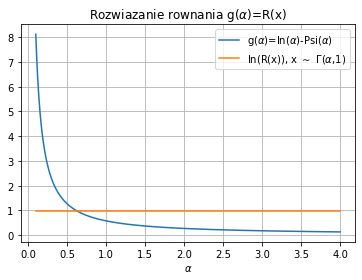

In [106]:
# KONIECZNA WARTOŚĆ w
xx = np.linspace(0.1, 4, 1000)
yy = []
for i in xx:
    yy.append(math.log(i) - sp.psi(i))
dd = []
for i in xx:
    dd.append(lRx)  
plt.plot(xx,yy, label=r'g($\alpha$)=ln($\alpha$)-Psi($\alpha$)')
plt.plot(xx,dd, label=r'ln(R(x)), x $\sim$ $\Gamma$($\alpha$,1)')
plt.title(r'Rozwiazanie rownania g($\alpha$)=R(x)')
plt.xlabel(r'$\alpha$')
plt.legend()
plt.grid()
plt.savefig("C:\\Users\\123\\Documents\\DDR\\Praca\\gR.pgf", bbox_inches='tight')
plt.show()
plt.close()

# Wyznaczenie rozwiązania równania g(\alpha) = ln R(x) metodą bisekcji

In [107]:
def g(v):
    return math.log(v) - sp.psi(v) - lRx
# Metoda bisekcji
iter = 100
delta = 0.00001
# KONIECZNA WARTOŚĆ lRx
ka = 0.00001
kb = 2*ALFA
for k in range(1, iter):
    v = (ka + kb) / 2
    if abs(g(v)) < delta:
        break
    else:
        if g(v) * g(ka) < 0:
            kb = v
        else:
            ka = v

# Wyznaczenie Estymatorów parametru kształtu

In [108]:
# Wyznaczenie Estymatora Największej Wiarogodności
eNW = opt.fsolve(g,0.01)
def gn(v):
    return  sp.psi(n*v) - sp.psi(v) - math.log(n) - lRx
# Wyznaczenie Estymatora Niezmienniczego Największej Wiarogodności
eNNW = opt.fsolve(gn,0.01)
lnX = []
for i in range(n):
    lnX.append(math.log(x[i]))
XlnX = []
for i in range(n):
    XlnX.append(x[i]*math.log(x[i]))
S = np.sum(x)
SlnX = np.sum(lnX)
SXlnX = np.sum(XlnX)
# Wyznaczenie Nowego Estymatora
NewE = (n*S)/(n*SXlnX - SlnX*S)
NewEK = (n-1)/(n+2)*NewE

In [109]:
print("Pierwiastekiem równiania z fsolve() jest x0 =",eNW,"g(eNW)=",g(eNW))
print("Pierwiastekiem równiania z Bisekcji jest v =",v,"g(v)=",g(v))
print("--------------------------------------------------------------------")
print("Estymator Największej Wiarogodności eNW =",eNW,", g(eNW)=",g(eNW))
print("Estymator Niezmienniczy Największej Wiarogodności eNNW =",eNNW,", g(eNNW)=",gn(eNNW))
print("Nowy Estymator NewE =",NewE)
print("Nowy Estymator z Korektą NewE =",NewEK)

Pierwiastekiem równiania z fsolve() jest x0 = [0.63239627] g(eNW)= [1.85407245e-14]
Pierwiastekiem równiania z Bisekcji jest v = 0.6323960874938965 g(v)= 3.261534312626324e-07
--------------------------------------------------------------------
Estymator Największej Wiarogodności eNW = [0.63239627] , g(eNW)= [1.85407245e-14]
Estymator Niezmienniczy Największej Wiarogodności eNNW = [0.62788329] , g(eNNW)= [1.4321877e-14]
Nowy Estymator NewE = 0.597669556617873
Nowy Estymator z Korektą NewE = 0.5800910402467591


In [143]:
#!pip install plotly
import plotly.graph_objects as go
!pip install -U kaleido
import kaleido

fig = go.Figure(data=[go.Table(header=dict(values=['n', r'$R^{*}$',r'$R^{**}$', r'$R^{***}$', r'$R^{****}$'], 
                                           fill_color='lightskyblue',
                                           align='left'),
                 cells=dict(values=[[n], [eNW] , [eNNW] , [NewE], [NewEK]], fill_color='lightcyan',align='left'))
                     ])
fig.update_layout(width=500, height=300)
fig.show()
fig.write_image(fig,'tb1.png', engine='kaleido')

ValueError: 
Image export using the "kaleido" engine requires the kaleido package,
which can be installed using pip:
    $ pip install -U kaleido
